**Building a SOM to predict fraudulent credit card applications**

Data source: http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Credit_Card_Applications.csv")

In [6]:
data.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [8]:
# All columns except class as array
X = data.iloc[:, :-1].values
# Class column separated as array
y = data.iloc[:, -1].values

In [10]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler = MinMaxScaler(feature_range = (0,1))

In [12]:
X = scaler.fit_transform(X)

In [13]:
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [14]:
# Training
from minisom import MiniSom

In [15]:
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)

In [16]:
som.train_random(X, num_iteration = 100)

In [17]:
# Visualising
from pylab import bone, pcolor, colorbar, plot, show

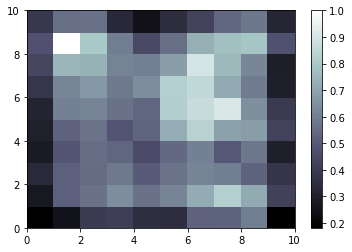

In [21]:
% matplotlib inline
bone()
pcolor(som.distance_map().T)
colorbar()

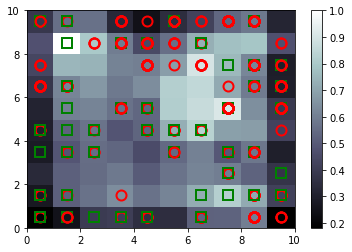

In [25]:
% matplotlib inline
bone()
pcolor(som.distance_map().T)
colorbar()

# Markers and colors to identify frauds (red circles) and genuine (green squares)
markers = ['o', 's']
colors = ['r', 'g']

for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, # w[0] is centre of x co-ordinate of winner, + 0.5 moves it to right
        w[1] + 0.5, # y co-ordinate of winner, + 0.5 moves it to right
        markers[y[i]], 
        markeredgecolor = colors[y[i]],
        markerfacecolor = 'None',
        markersize = 10,
        markeredgewidth = 2)
show()

In [27]:
# Finding fraud accounts
mappings = som.win_map(X)

In [28]:
mappings

defaultdict(list,
            {(0,
              0): [array([0.94393122, 0.        , 0.33082707, 0.03267857, 0.5       ,
                     0.38461538, 0.375     , 0.02631579, 1.        , 1.        ,
                     0.05970149, 0.        , 0.5       , 0.        , 0.01583   ]), array([1.        , 0.        , 0.65157895, 0.69642857, 0.5       ,
                     0.53846154, 0.375     , 0.19298246, 1.        , 1.        ,
                     0.10447761, 0.        , 0.5       , 0.        , 0.03      ]), array([7.82624365e-01, 0.00000000e+00, 4.13533835e-02, 4.46428571e-02,
                     5.00000000e-01, 7.69230769e-01, 3.75000000e-01, 8.77192982e-03,
                     0.00000000e+00, 1.00000000e+00, 1.49253731e-02, 0.00000000e+00,
                     5.00000000e-01, 5.40000000e-02, 9.80000000e-04]), array([0.97028779, 0.        , 0.21684211, 0.01339286, 0.5       ,
                     0.76923077, 0.375     , 0.02052632, 1.        , 1.        ,
                     0.0

In [31]:
frauds = np.concatenate((mappings[(1,8)], mappings[(6,7)]), axis = 0) # Winning npde

In [32]:
frauds

array([[9.37300033e-01, 1.00000000e+00, 6.41654135e-01, 1.00000000e+00,
        0.00000000e+00, 5.38461538e-01, 3.75000000e-01, 1.00000000e+00,
        1.00000000e+00, 1.00000000e+00, 5.97014925e-01, 0.00000000e+00,
        5.00000000e-01, 0.00000000e+00, 1.50000000e-04],
       [3.96069339e-02, 0.00000000e+00, 1.65413534e-01, 4.88035714e-01,
        5.00000000e-01, 7.69230769e-01, 8.75000000e-01, 5.26315789e-02,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 1.40000000e-01, 1.00000000e-05],
       [1.12602061e-01, 0.00000000e+00, 3.87969925e-02, 7.50000000e-03,
        5.00000000e-01, 3.84615385e-01, 3.75000000e-01, 4.38596491e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        5.00000000e-01, 1.00000000e-01, 1.00000000e-05],
       [3.79667560e-01, 0.00000000e+00, 1.22857143e-01, 4.16607143e-01,
        5.00000000e-01, 2.30769231e-01, 8.75000000e-01, 2.98245614e-03,
        0.00000000e+00, 0.00000000e+0

In [33]:
# Inverse transform
frauds = scaler.inverse_transform(frauds)

In [34]:
frauds

array([[1.5799785e+07, 1.0000000e+00, 5.6420000e+01, 2.8000000e+01,
        1.0000000e+00, 8.0000000e+00, 4.0000000e+00, 2.8500000e+01,
        1.0000000e+00, 1.0000000e+00, 4.0000000e+01, 0.0000000e+00,
        2.0000000e+00, 0.0000000e+00, 1.6000000e+01],
       [1.5575605e+07, 0.0000000e+00, 2.4750000e+01, 1.3665000e+01,
        2.0000000e+00, 1.1000000e+01, 8.0000000e+00, 1.5000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.8000000e+02, 2.0000000e+00],
       [1.5593834e+07, 0.0000000e+00, 1.6330000e+01, 2.1000000e-01,
        2.0000000e+00, 6.0000000e+00, 4.0000000e+00, 1.2500000e-01,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00, 2.0000000e+02, 2.0000000e+00],
       [1.5660528e+07, 0.0000000e+00, 2.1920000e+01, 1.1665000e+01,
        2.0000000e+00, 4.0000000e+00, 8.0000000e+00, 8.5000000e-02,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
        2.0000000e+00,